In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_PATH = '../data-new/pre-processed-data.csv'
df = pd.read_csv(DATASET_PATH)

In [2]:
# Asumptions
NUMERICAL_FEATURES = ['EDAD','PESO Kg', 'ALTURA cm', 'TROPONINA MAX', 'CREAT', 'GLUCEMIA INGR', 'GB', 'TAS INGRESO', 'FC INGRESO']
NUMERICAL_CONTINOUS = NUMERICAL_FEATURES

CATEGORICAL_MULTI_CLASS_FEATURES = ['KILLIP Ingreso', 'FUNCION VENTRICULAR IZQ', 'DIAGNOSTICO', 'NUMERO VASOS', 'Peor KILLIP']
CATEGORICAL_BINARY_FEATURES = ['NUMERO VASOS', 'SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRI', 'BRD', 'ECG MCP', 'ECG FA', 'tropst', 'TnT Ultrasensible', 'Elevacion troponina T', 'AAS', 'BB', 'IECA', 'AT2', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'B CA', 'ESTATINAS', 'HIPOGLUC METFORM', 'HIPOGL SULFAN', 'HIPOGL GLITAZ', 'INSULINA', 'INS + HIPOGL', 'INOTROPICOS', 'PRUEBA FUNC.', 'PRUEBA FUNC DE ALTO RIESGO', 'CCG', 'TRONCO', 'ATC PRIMARIA', 'ATC INTRAHOSP', 'TROMBOL', 'CRM', 'IAM HOSP(SI INTERNO POR ANGINA) O REIAM', 'APIAM', 'ANGINA REFRACT o RECURR', ' ACV/TIA', 'SANGRADO MAYOR*', 'I RENAL AGUDA']

CATEGORY_FEATURES = CATEGORICAL_BINARY_FEATURES + CATEGORICAL_MULTI_CLASS_FEATURES

TARGET = "MUERTE HOSP"

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     1818 non-null   int64  
 1   SEX0                                     1818 non-null   int64  
 2   HTA                                      1818 non-null   int64  
 3   DBT                                      1818 non-null   int64  
 4   DLP                                      1818 non-null   int64  
 5   TABAQ                                    1818 non-null   int64  
 6   ANTEC IAM / Angina inestable             1818 non-null   int64  
 7   ANTEC BY PASS                            1818 non-null   int64  
 8   ANTEC ATC                                1818 non-null   int64  
 9   ANTEC ACE                                1818 non-null   int64  
 10  ANTEC INS RENAL                          1818 no

In [4]:
df.describe()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,TROMBOL,CRM,MUERTE HOSP,IAM HOSP(SI INTERNO POR ANGINA) O REIAM,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1817.000000,1815.000000,1818.000000,1815.000000,1815.00000,1818.000000,1815.000000,1814.000000,1814.000000,1816.000000
mean,66.449945,0.704620,0.663916,0.196370,0.547305,0.350385,0.265127,0.072607,0.186469,0.039054,...,0.008255,0.080441,0.035204,0.014876,0.01157,1.073707,0.034711,0.002756,0.015436,0.055617
std,12.313550,0.456339,0.472498,0.397361,0.497894,0.477222,0.441522,0.259562,0.389592,0.193777,...,0.090508,0.272049,0.184345,0.121090,0.10697,0.403700,0.183097,0.052443,0.123311,0.229243
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,1.000000,1.000000,1.000000


Buscamos las columnas que son categoricas y solo toman dos valores posibles: `1` o `0`.

In [5]:
# Función para encontrar columnas que solo tienen valores 0 y 1
def find_binary_columns(df):
    binary_columns = [col for col in df.columns if df[col].isin([0, 1]).all()]
    return binary_columns

# Aplicamos la función al DataFrame
binary_columns = find_binary_columns(df)

# Mostramos las columnas que solo tienen valores 0 y 1
print(binary_columns)

['SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRD', 'ECG MCP', 'TnT Ultrasensible', 'Elevacion troponina T', 'AAS', 'IECA', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'ESTATINAS', 'HIPOGL SULFAN', 'PRUEBA FUNC.', 'CCG', 'ATC PRIMARIA', 'ATC INTRAHOSP', 'MUERTE HOSP']


Ahora bucamos las columnas con valores enteros ya que pueden ser columnas categoricas codificadas con numeros:

No consideramos la columna `EDAD` ya que siempre es una columna entera. Vemos los valores que toman las demas columnas:

In [6]:
for col in df.columns:
    print(f"{col.title()}: {df[col].unique()}")

Edad: [ 76  94  66  56  41  61  86  58  59  88  79  82  67  53  46  42  63  73
  69  60  62  44  78  77  68  49  87  80  74  83  37  64  55  54  70  92
  85  51  65  72  57  90  91  75  47  71  50  45  52  81  96  48  39  38
  89  31  84  29  40  32  35  95  43 100  33  93  34  25]
Sex0: [0 1]
Hta: [1 0]
Dbt: [1 0]
Dlp: [1 0]
Tabaq: [0 1]
Antec Iam / Angina Inestable: [0 1]
Antec By Pass: [1 0]
Antec Atc: [1 0]
Antec Ace: [0 1]
Antec Ins Renal: [0 1]
Acv Tia Prev: [0 1]
Epoc: [0 1]
Claud Itte: [0 1]
Bb Prev: [1 0]
 Ieca/At2  Prev: [1 0]
B Ca Prev: [0 1]
Aas Prev: [1 0]
Hipoglucemiantes: [0 1]
Diureticos: [0 1]
Insulina: [1 0]
Peso Kg: [ 70.   65.   60.   75.   95.   73.  105.   85.   86.   82.   80.  103.
  69.   54.   97.   78.   93.   68.   55.   71.   72.   83.   62.  100.
  90.   79.   61.   67.   74.   58.   66.   77.   98.   87.   92.   57.
  88.   50.   63.   99.  120.   84.   94.  104.   96.   91.   81.  125.
 130.   64.  107.  110.  108.   89.   76.   48.   53.   59.    nan  4

Podemos ver que nos las features categoricas no-binarias son `Killip Ingreso`, `Funcion Ventricular Izq` y `Peor Killip`

In [7]:
print(f"'KILLIP Ingreso': {df['KILLIP Ingreso'].unique()}")
print(f"'Peor KILLIP': {df['Peor KILLIP'].unique()}")
print(f"'FUNCION VENTRICULAR IZQ': {df['FUNCION VENTRICULAR IZQ'].unique()}")


'KILLIP Ingreso': [1 2 4 3]
'Peor KILLIP': [1 2 3 4 0]
'FUNCION VENTRICULAR IZQ': [ 1.  2.  3. nan  4.]


In [8]:
df[NUMERICAL_FEATURES + [TARGET]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           1818 non-null   int64  
 1   PESO Kg        1725 non-null   float64
 2   ALTURA cm      1698 non-null   float64
 3   TROPONINA MAX  1809 non-null   float64
 4   CREAT          1808 non-null   float64
 5   GLUCEMIA INGR  1735 non-null   float64
 6   GB             1752 non-null   float64
 7   TAS INGRESO    1806 non-null   float64
 8   FC INGRESO     1807 non-null   float64
 9   MUERTE HOSP    1818 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 142.2 KB


In [9]:
for column in df.columns:
    na_count = sum(df[column].isna())
    print(f"{column} NaNs: {na_count} - {round(((na_count * 100) / len(df)), 1)}%")

EDAD NaNs: 0 - 0.0%
SEX0 NaNs: 0 - 0.0%
HTA NaNs: 0 - 0.0%
DBT NaNs: 0 - 0.0%
DLP NaNs: 0 - 0.0%
TABAQ NaNs: 0 - 0.0%
ANTEC IAM / Angina inestable NaNs: 0 - 0.0%
ANTEC BY PASS NaNs: 0 - 0.0%
ANTEC ATC NaNs: 0 - 0.0%
ANTEC ACE NaNs: 0 - 0.0%
ANTEC INS RENAL NaNs: 0 - 0.0%
ACV TIA PREV NaNs: 0 - 0.0%
EPOC NaNs: 0 - 0.0%
CLAUD ITTE NaNs: 0 - 0.0%
BB PREV NaNs: 0 - 0.0%
 IECA/AT2  PREV NaNs: 0 - 0.0%
B CA PREV NaNs: 0 - 0.0%
AAS PREV NaNs: 0 - 0.0%
HIPOGLUCEMIANTES NaNs: 0 - 0.0%
DIURETICOS NaNs: 0 - 0.0%
INSULINA NaNs: 0 - 0.0%
PESO Kg NaNs: 93 - 5.1%
ALTURA cm NaNs: 120 - 6.6%
ECG INFRA ST NaNs: 0 - 0.0%
ECG SUPRA ST NaNs: 0 - 0.0%
ECG INV T NaNs: 0 - 0.0%
BRI NaNs: 1 - 0.1%
BRD NaNs: 0 - 0.0%
ECG MCP NaNs: 0 - 0.0%
ECG FA NaNs: 1 - 0.1%
tropst NaNs: 2 - 0.1%
TnT Ultrasensible NaNs: 0 - 0.0%
TROPONINA MAX NaNs: 9 - 0.5%
Elevacion troponina T NaNs: 0 - 0.0%
CREAT NaNs: 10 - 0.6%
GLUCEMIA INGR NaNs: 83 - 4.6%
GB NaNs: 66 - 3.6%
TAS INGRESO NaNs: 12 - 0.7%
FC INGRESO NaNs: 11 - 0.6%
KILLIP 

In [10]:
df[NUMERICAL_FEATURES + [TARGET]].describe()

,EDAD,PESO Kg,ALTURA cm,TROPONINA MAX,CREAT,GLUCEMIA INGR,GB,TAS INGRESO,FC INGRESO,MUERTE HOSP
count,1818.000000,1725.000000,1698.000000,1809.000000,1808.000000,1735.000000,1752.000000,1806.000000,1807.000000,1818.000000
mean,66.449945,78.875652,170.285041,883.027011,1.044110,128.156772,8986.970890,135.709856,74.406752,0.035204
std,12.313550,14.537725,11.264539,2890.124189,0.620834,54.957336,4117.168852,23.804536,16.136187,0.184345
min,25.000000,40.000000,55.000000,0.000000,0.060000,60.000000,1050.000000,70.000000,30.000000,0.000000
25%,58.000000,70.000000,165.000000,1.100000,0.800000,99.000000,6580.000000,120.000000,64.000000,0.000000
50%,66.000000,78.000000,170.000000,32.000000,0.950000,111.000000,8250.000000,130.000000,72.000000,0.000000
75%,76.000000,87.000000,177.000000,321.000000,1.140000,136.000000,10410.000000,150.000000,81.000000,0.000000
max,100.000000,164.000000,200.000000,40000.000000,14.000000,679.000000,71900.000000,240.000000,180.000000,1.000000


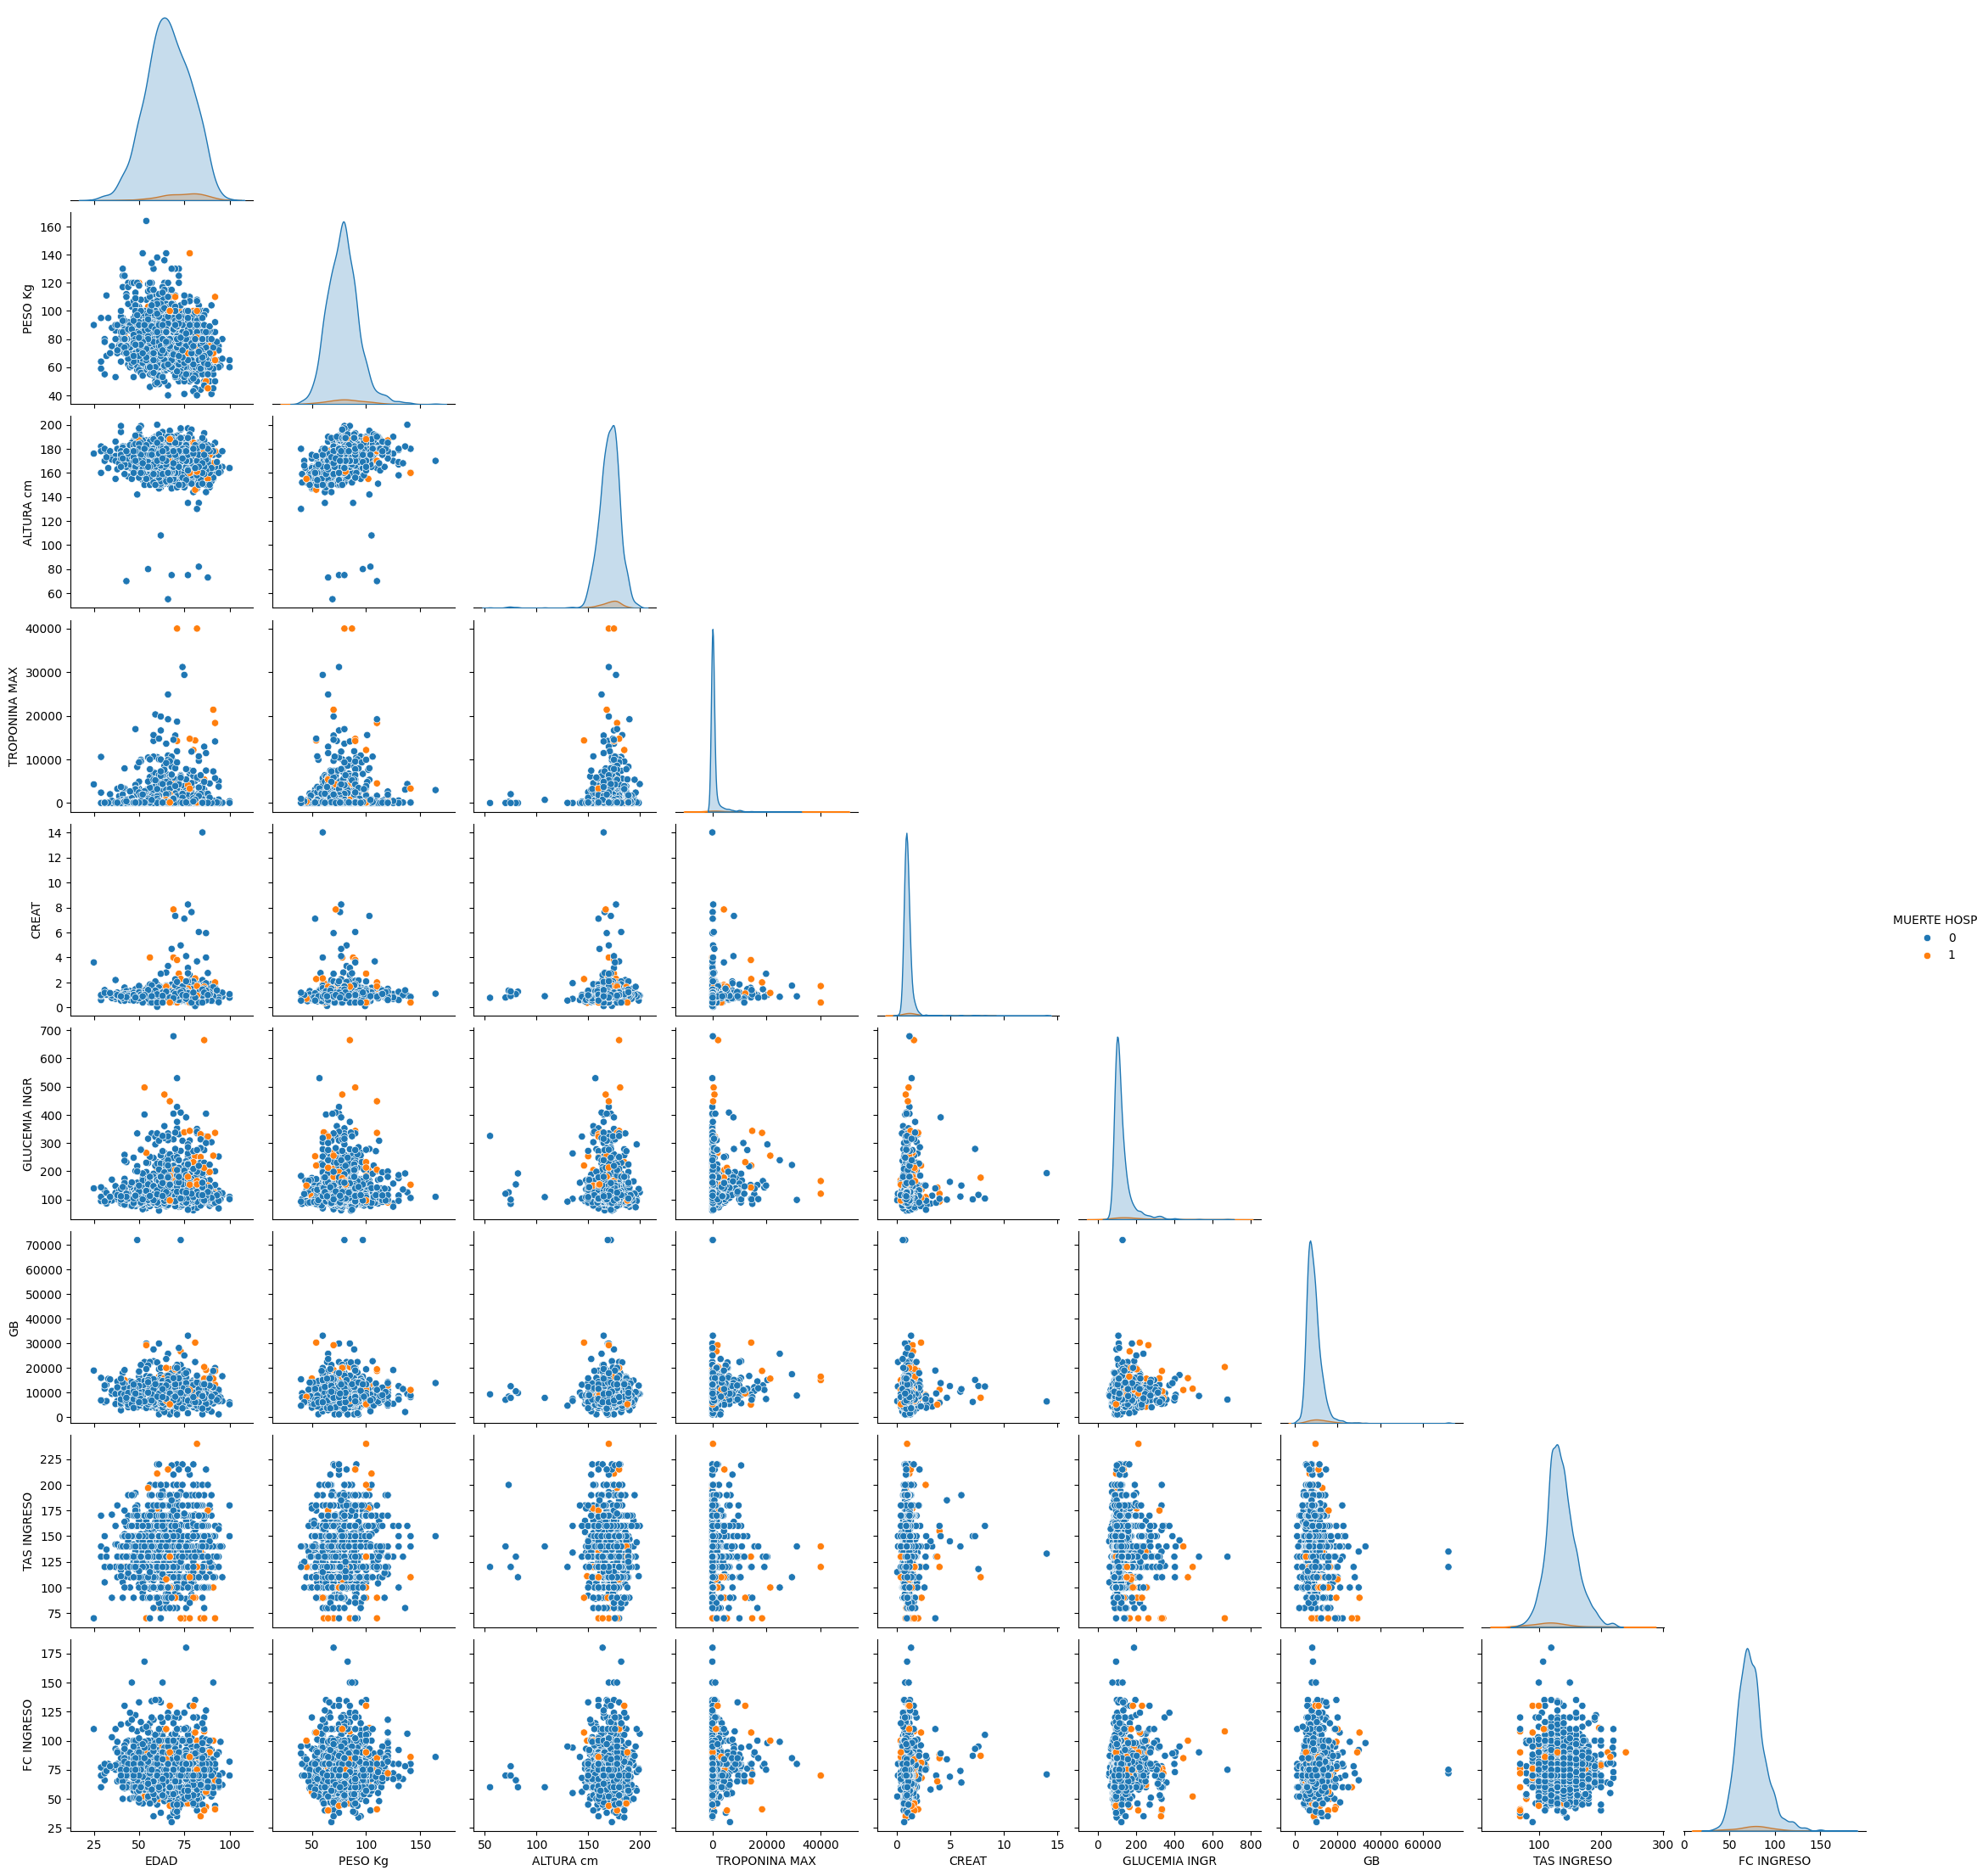

In [11]:
sns.pairplot(data=df[NUMERICAL_FEATURES + [TARGET]], corner=True, hue=TARGET)

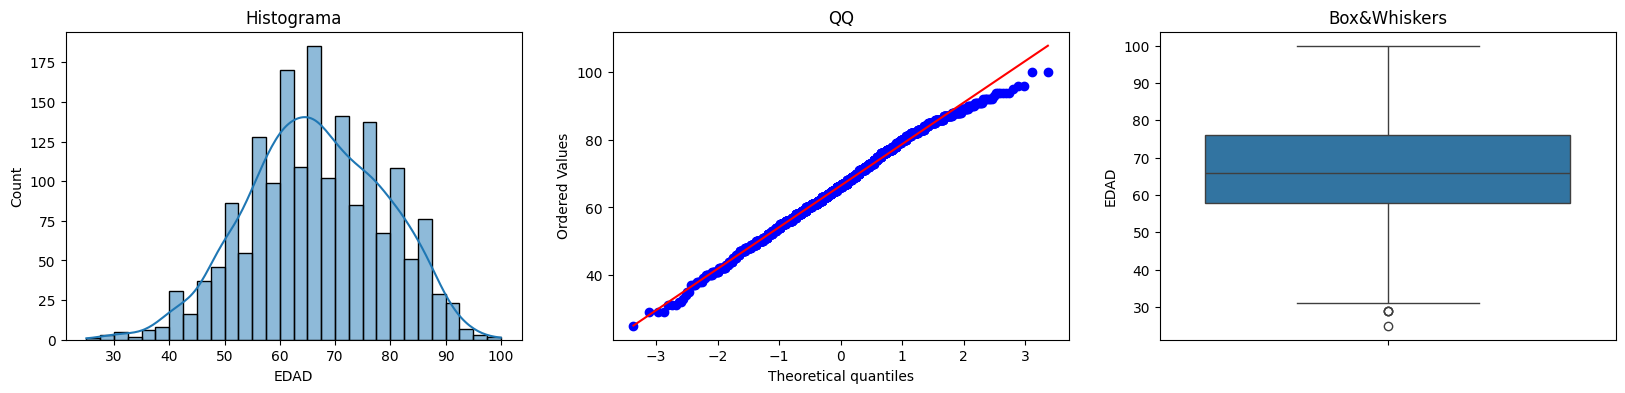

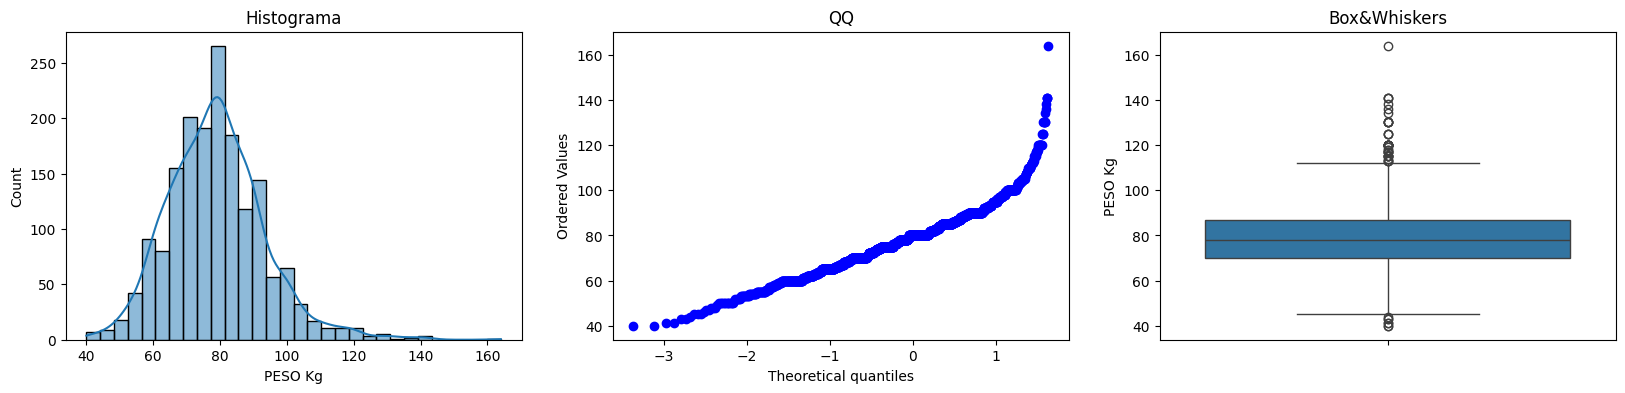

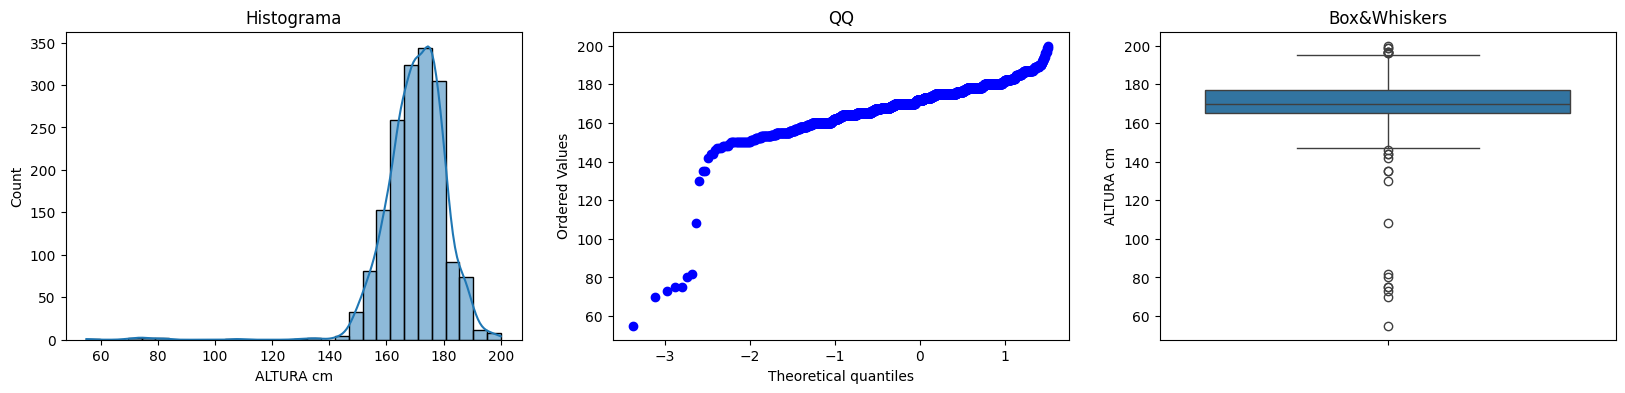

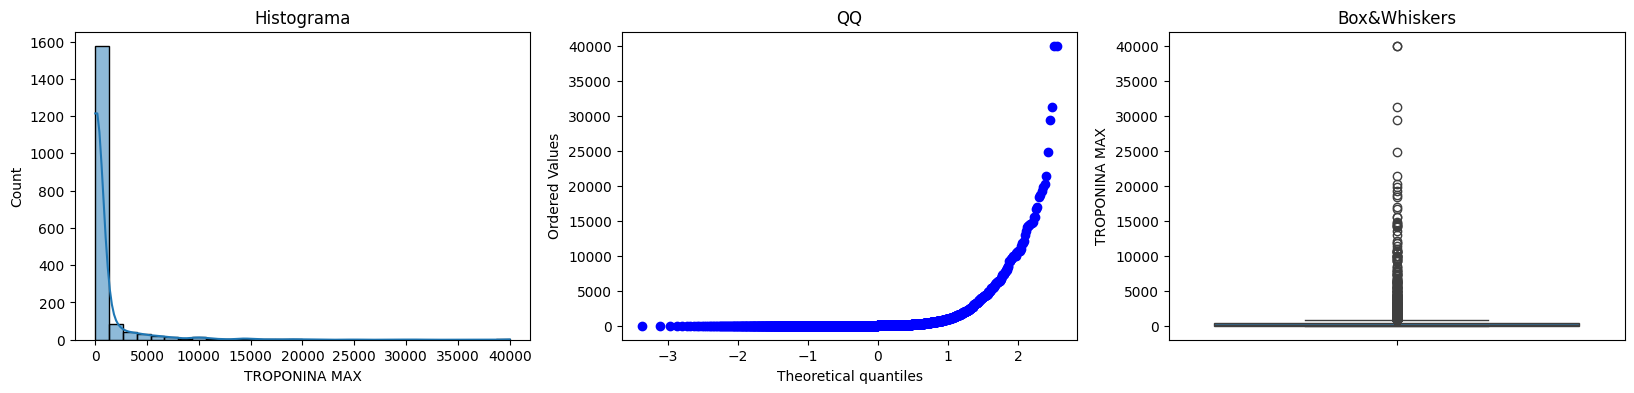

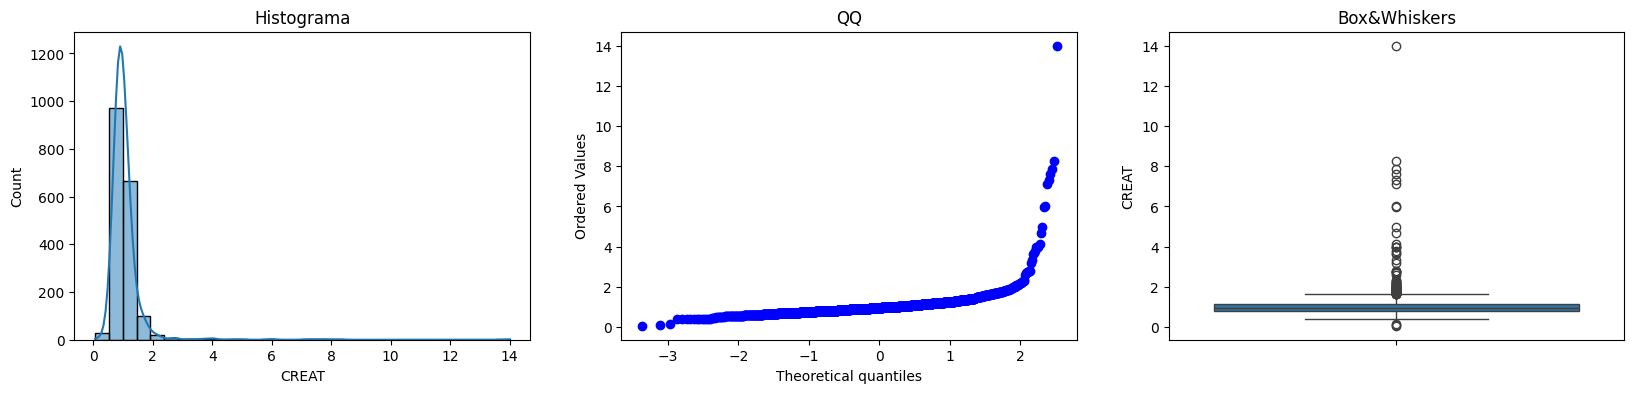

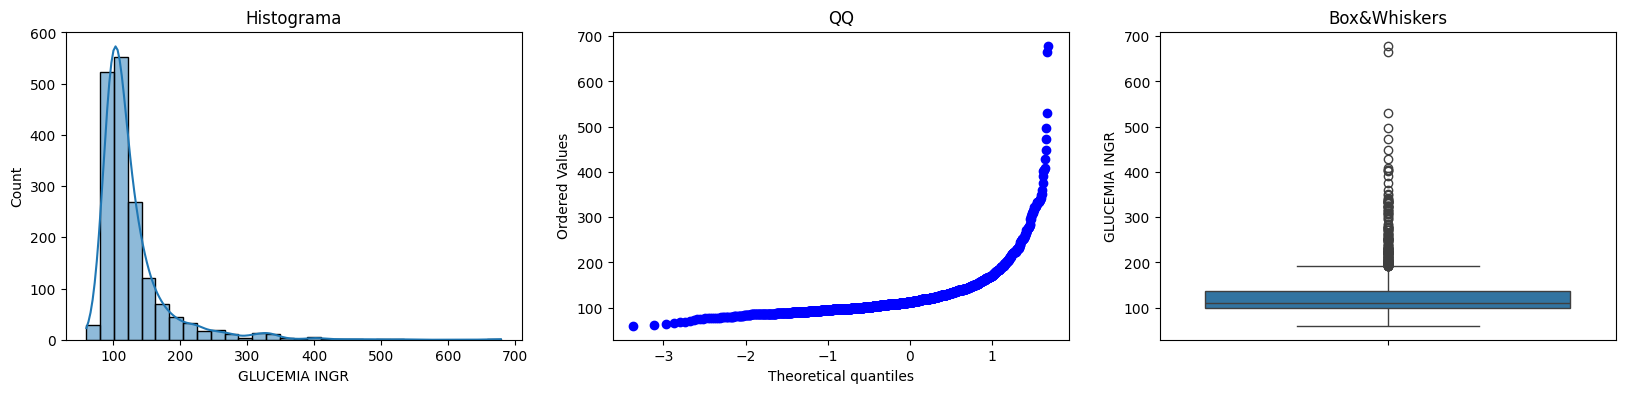

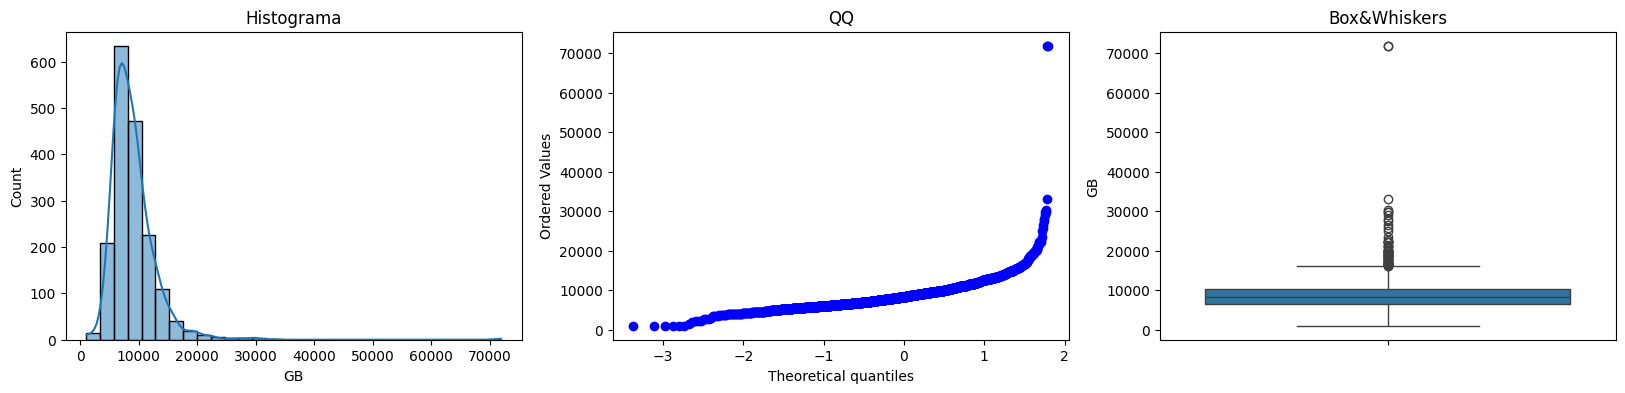

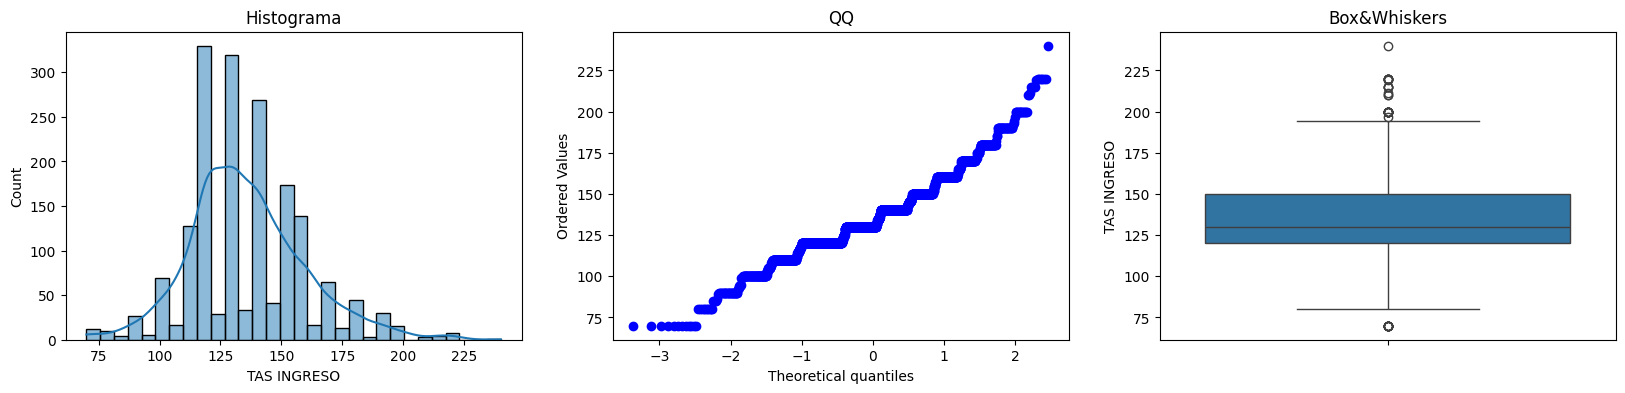

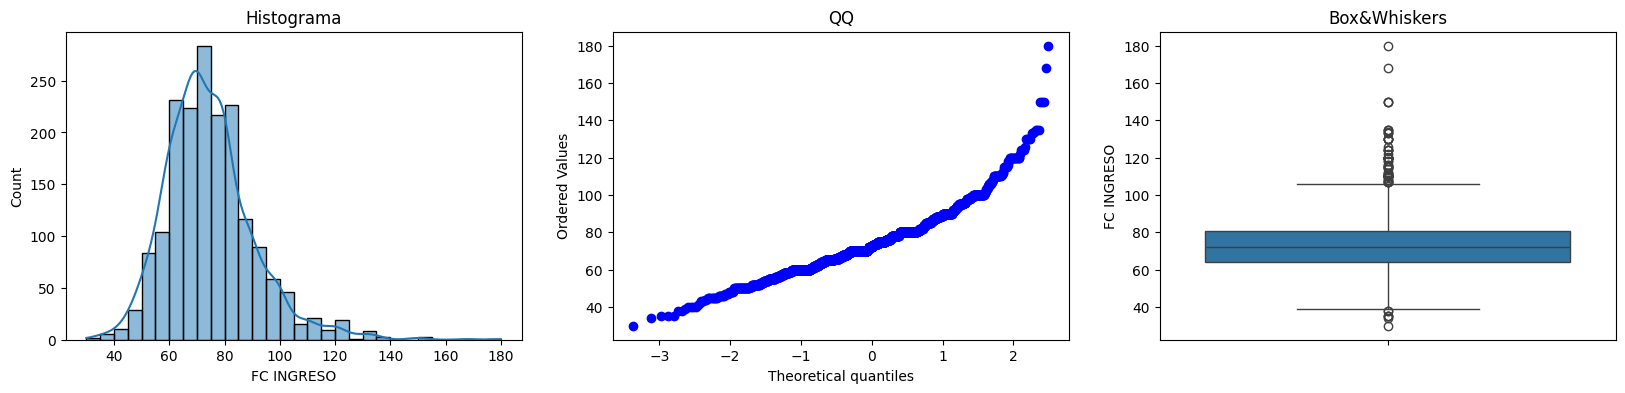

In [12]:
from utils import outlier_diagnostic_plots

for column in df[NUMERICAL_FEATURES].columns:
    outlier_diagnostic_plots(df, column)

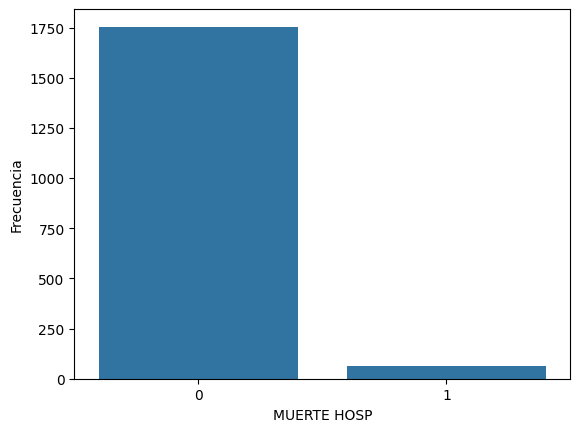

In [13]:
frecuencias_target = df[TARGET].value_counts()

df_frecuencias = frecuencias_target.reset_index()
df_frecuencias.columns = [TARGET, 'Frecuencia']

sns.barplot(x=TARGET, y='Frecuencia', data=df_frecuencias)
plt.show()

In [14]:
for index, frec in frecuencias_target.items():
    print(f"{TARGET} {index}: {round((frec * 100) / len(df), 1)}%")

MUERTE HOSP 0: 96.5%
MUERTE HOSP 1: 3.5%


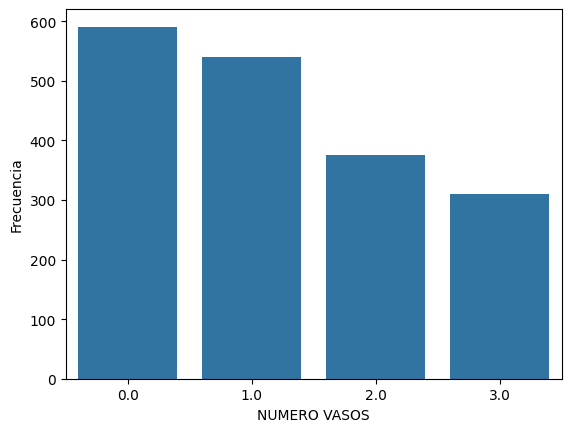

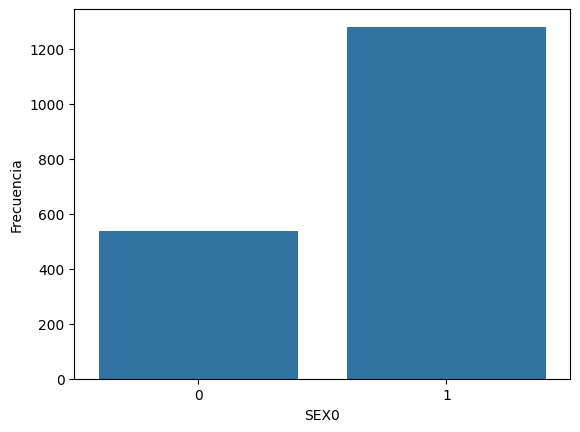

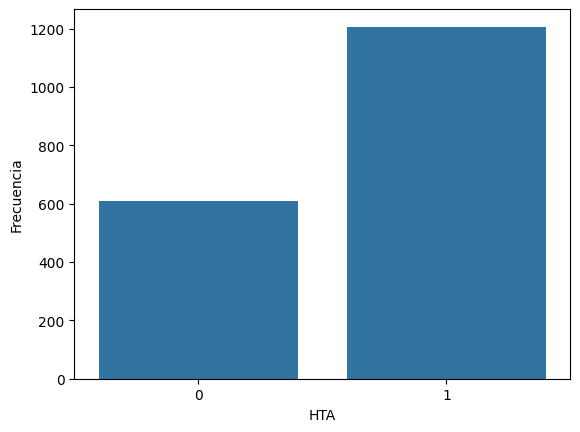

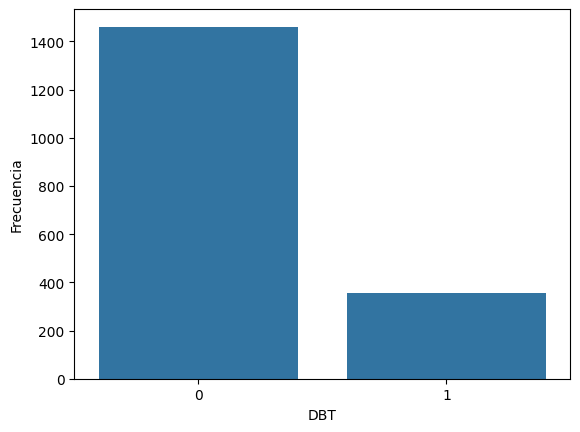

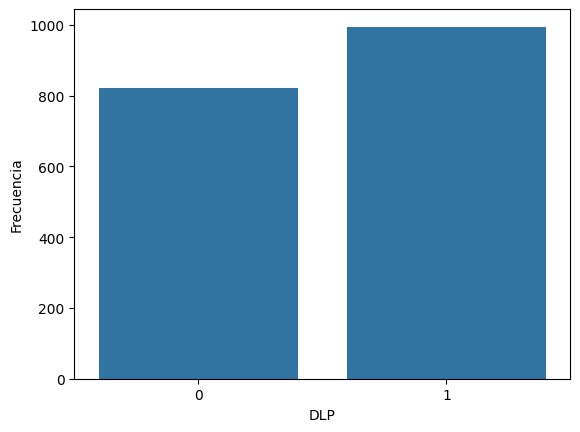

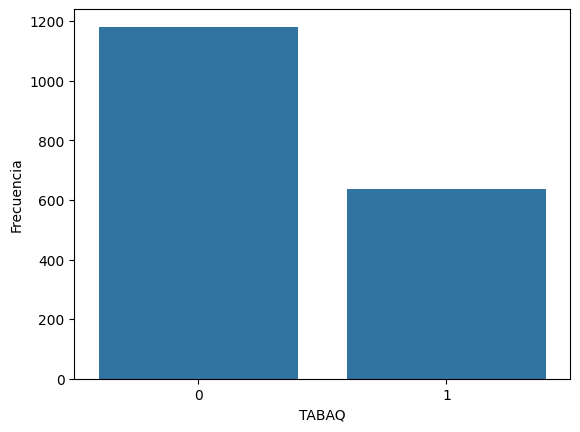

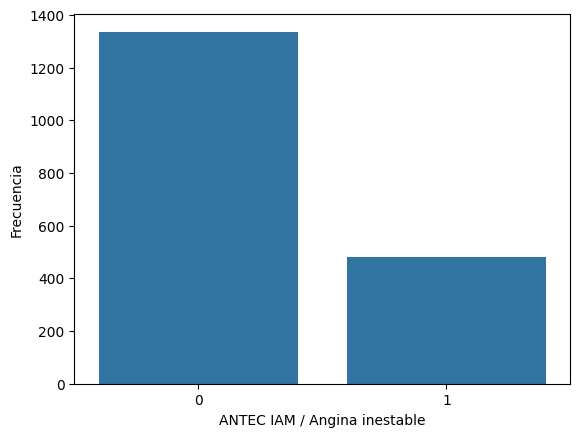

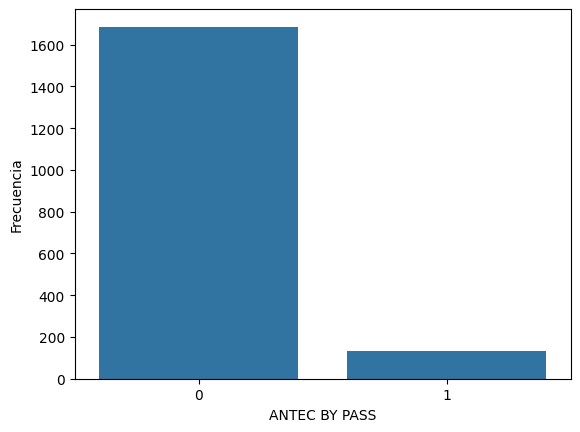

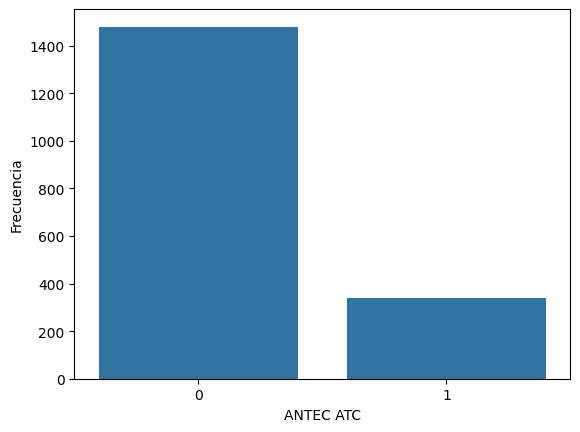

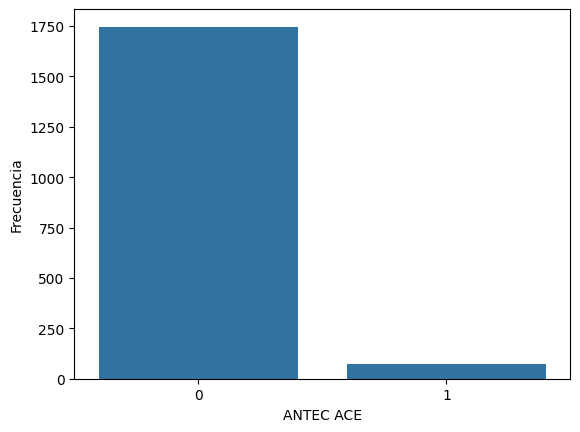

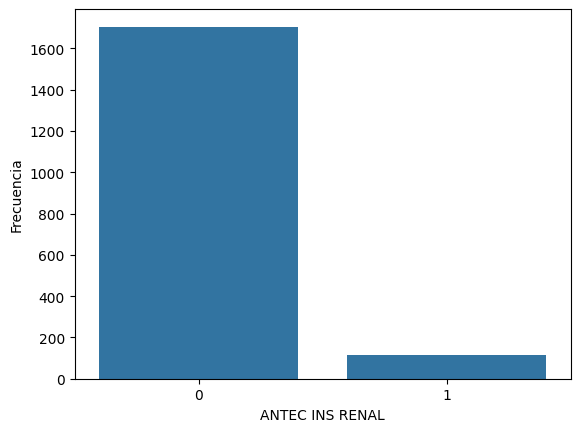

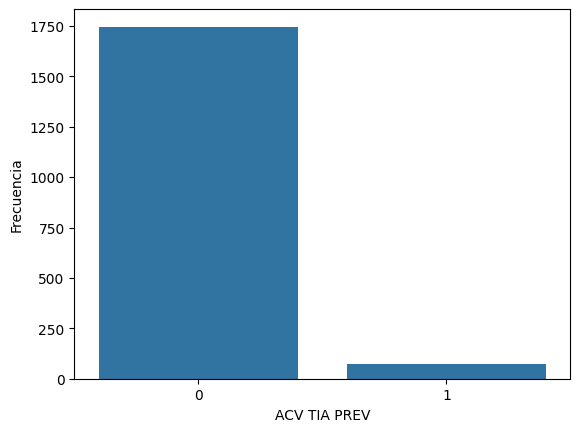

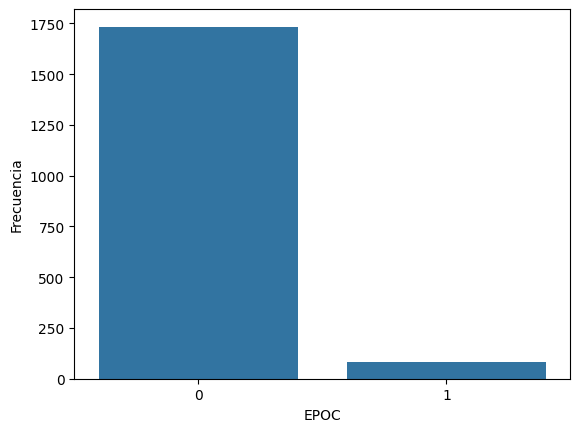

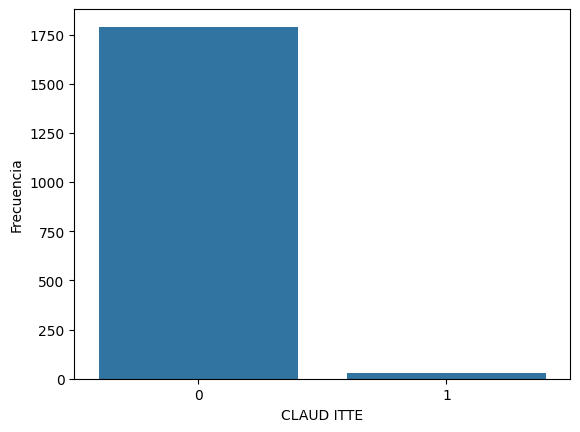

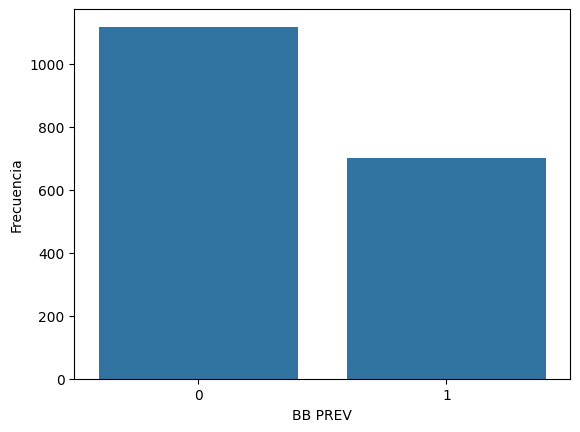

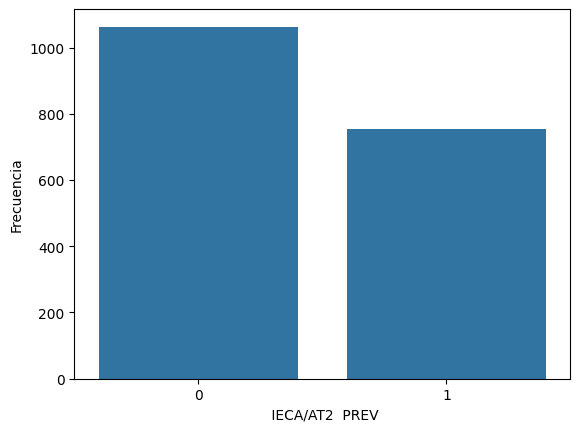

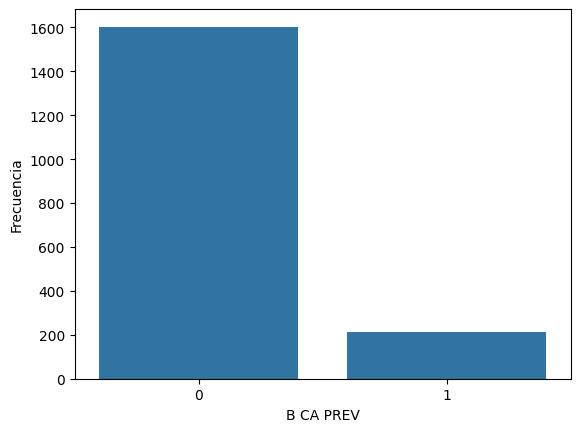

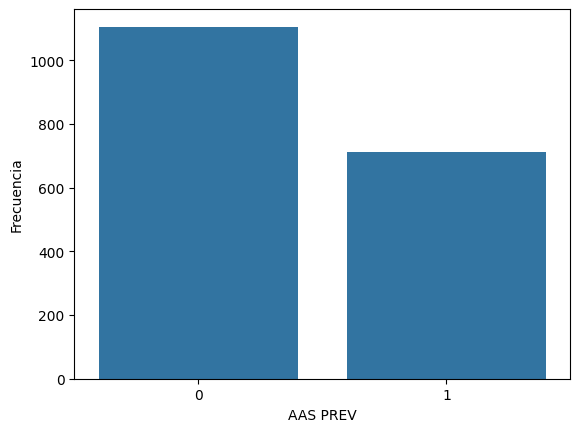

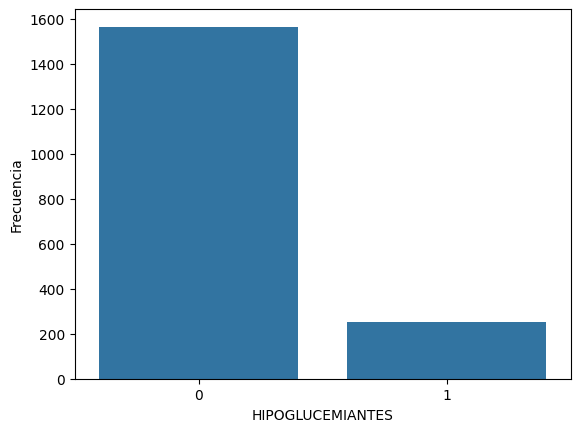

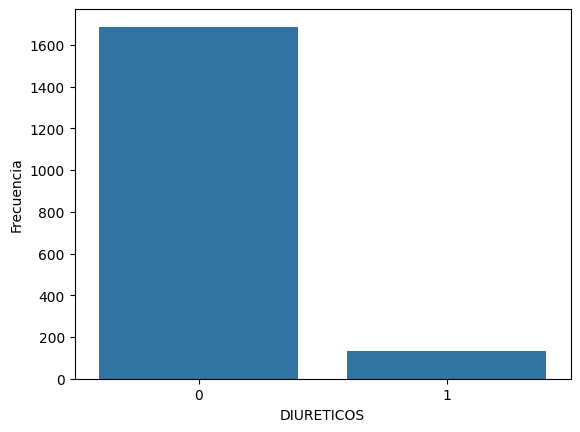

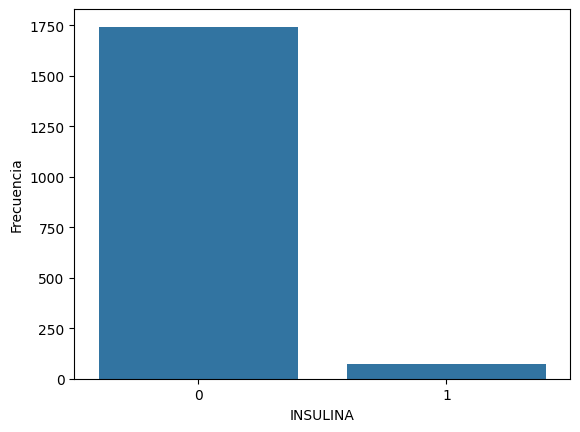

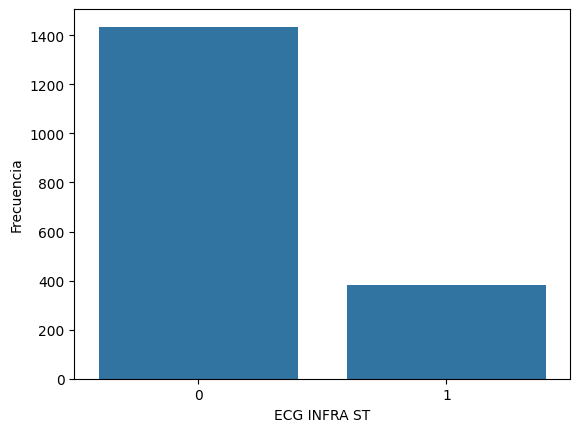

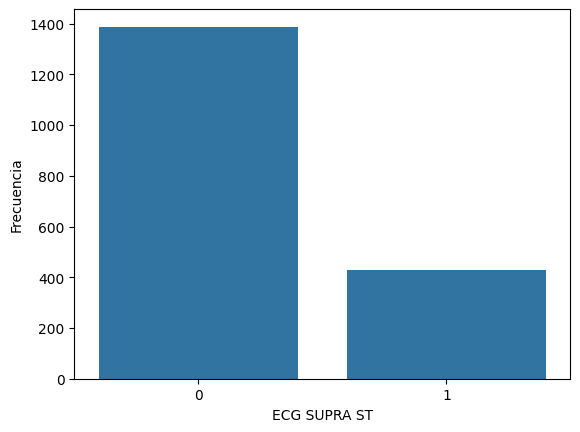

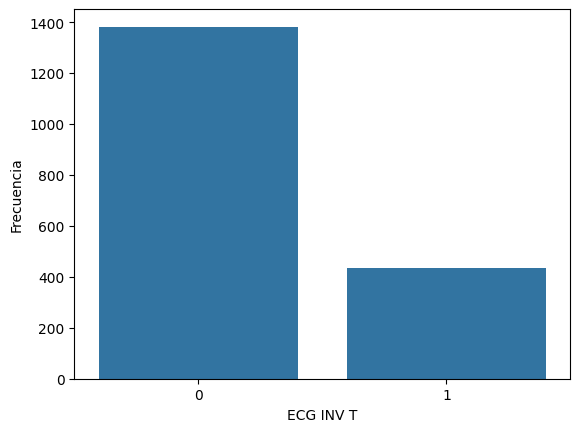

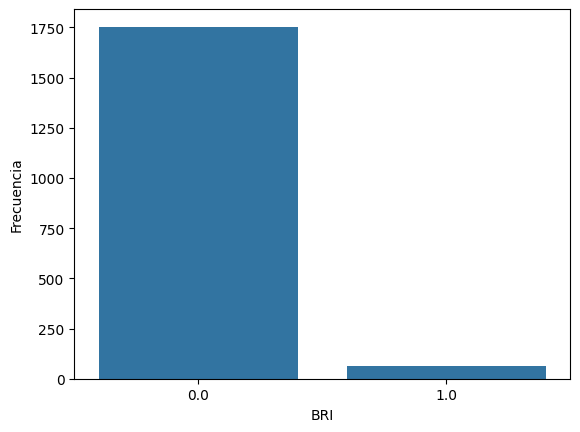

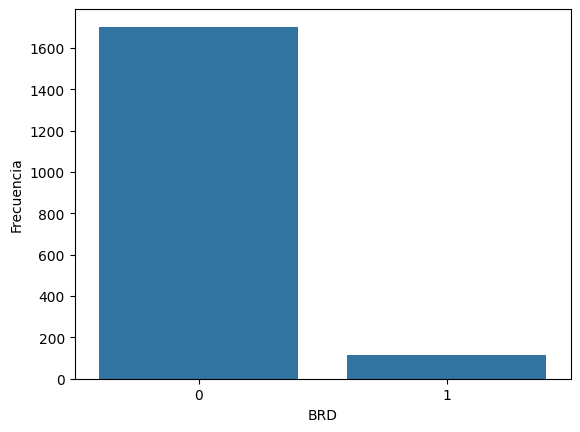

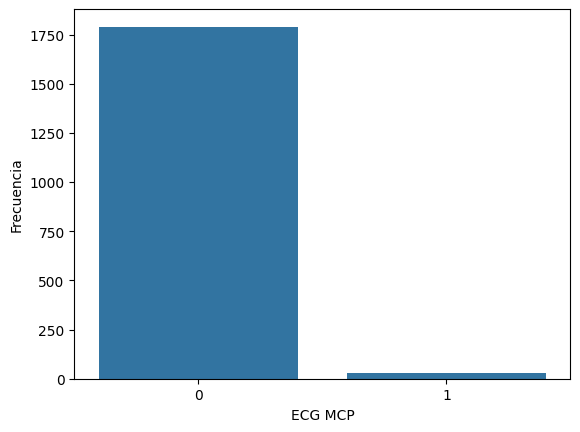

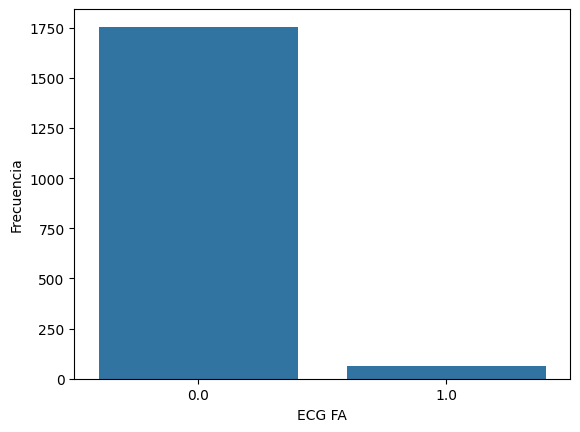

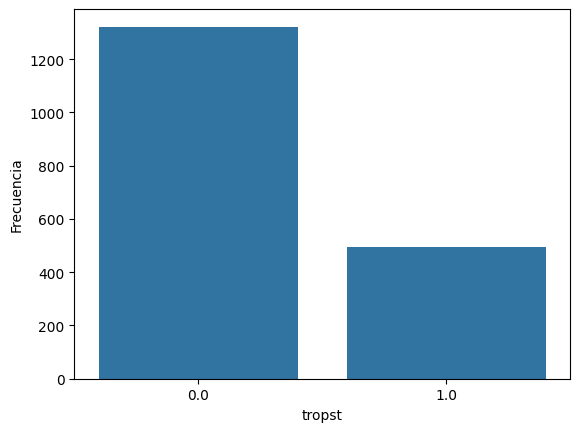

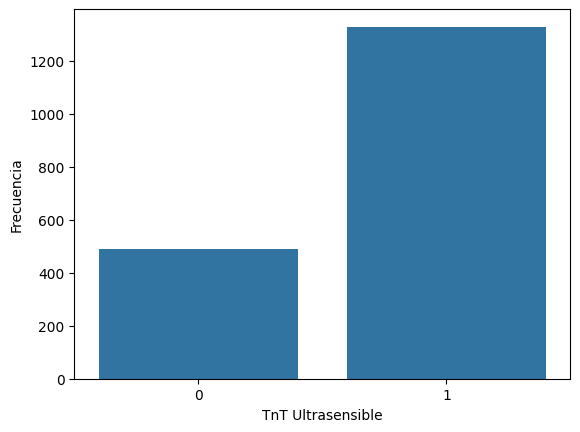

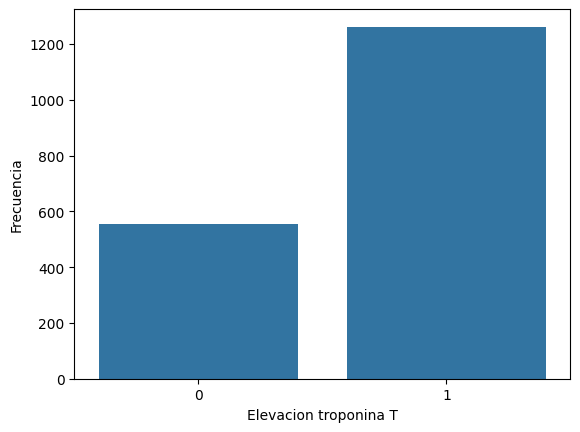

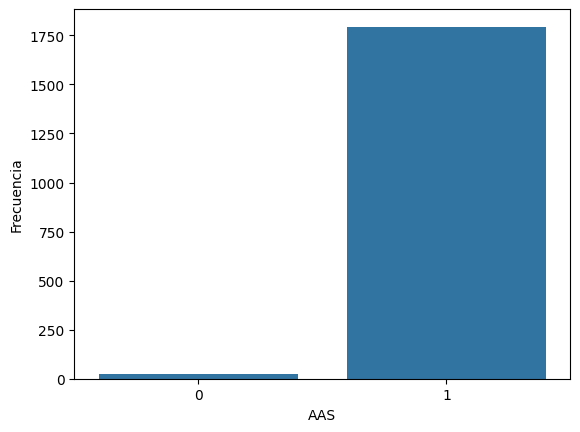

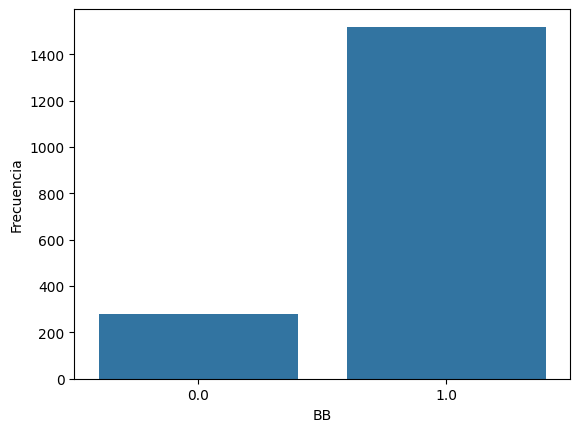

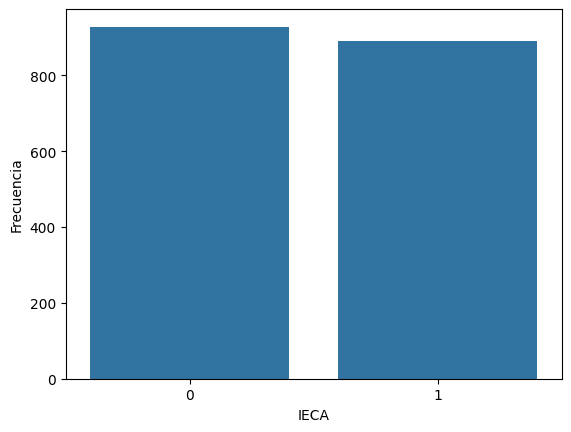

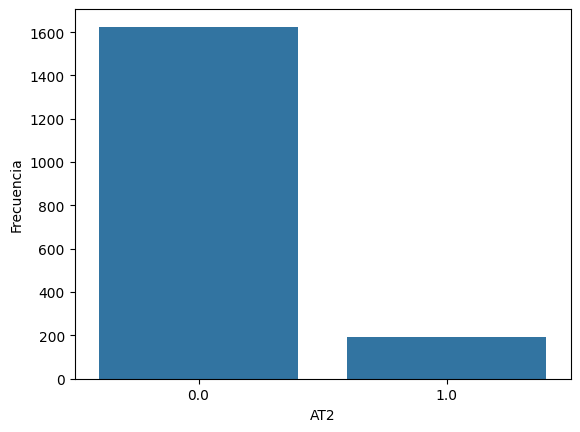

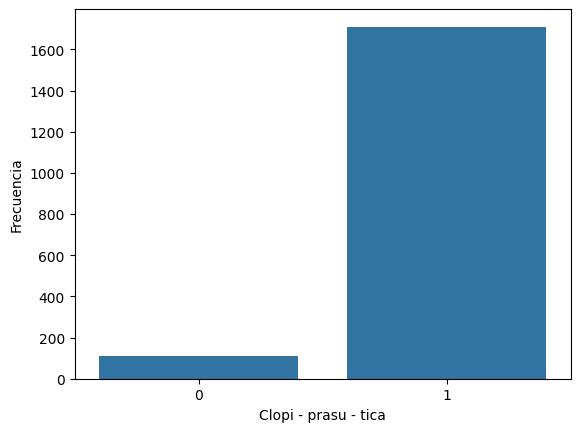

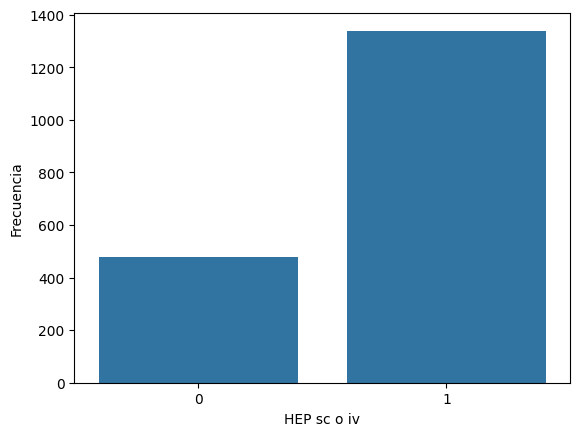

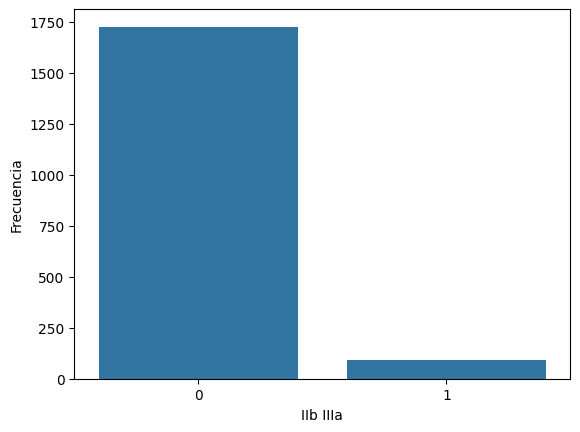

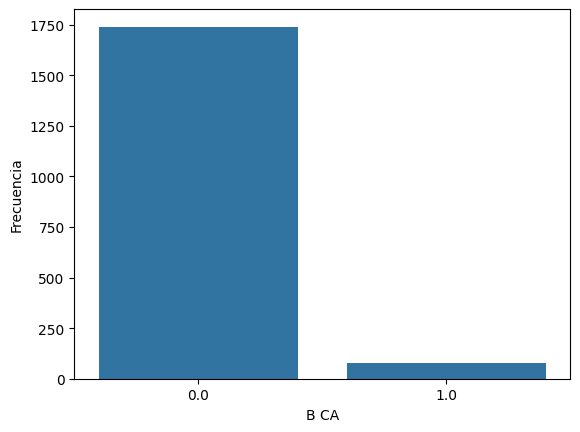

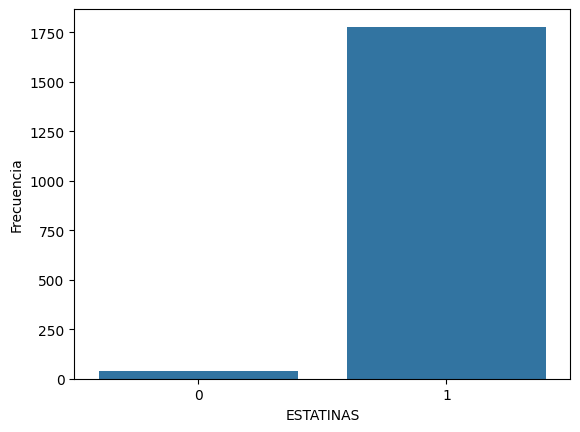

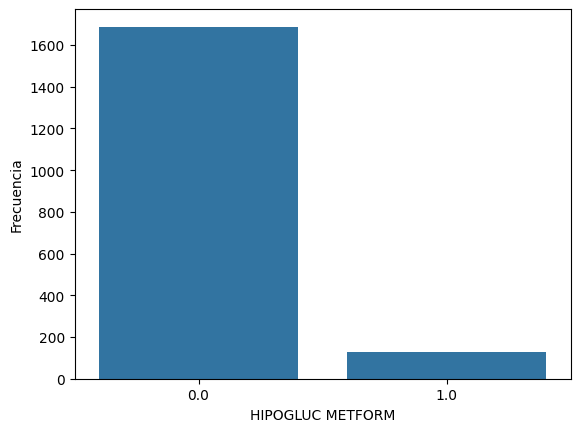

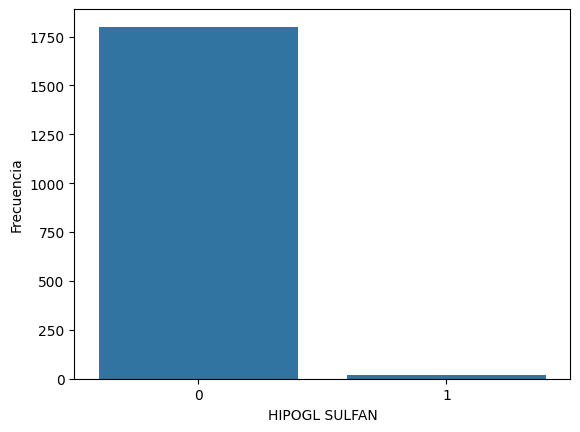

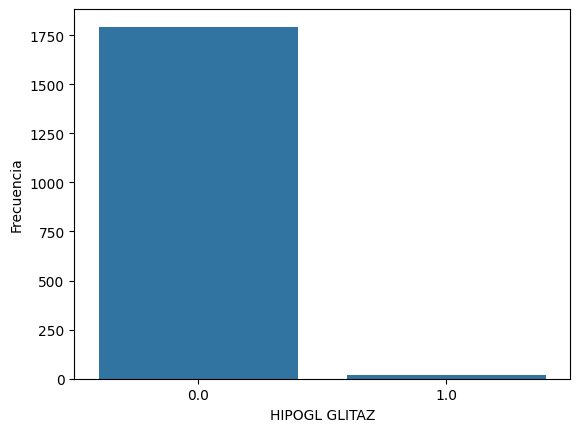

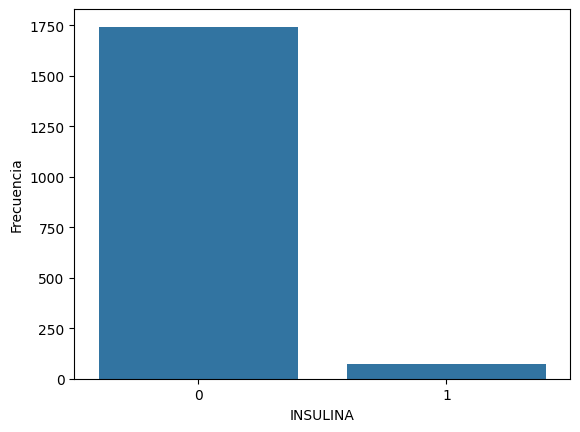

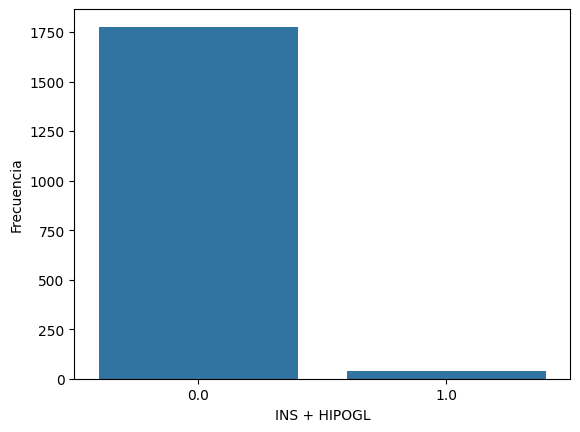

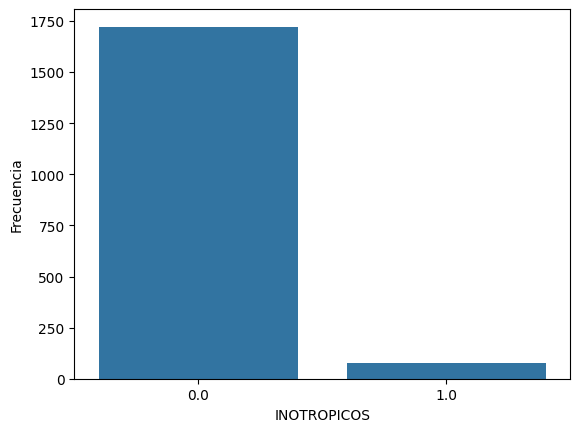

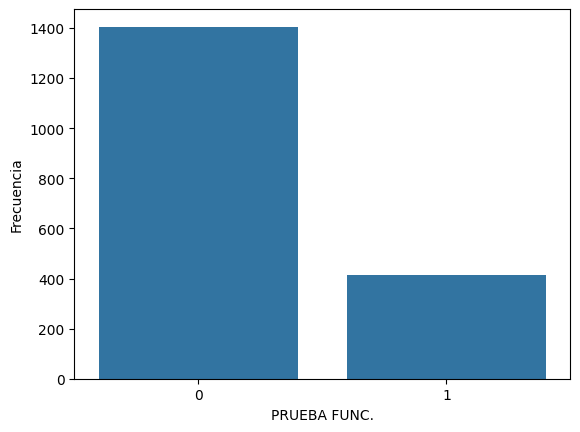

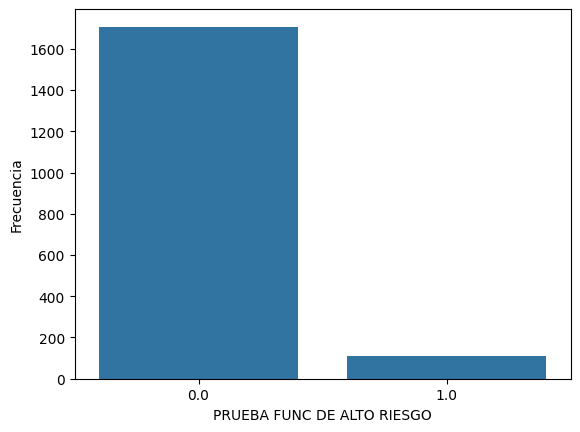

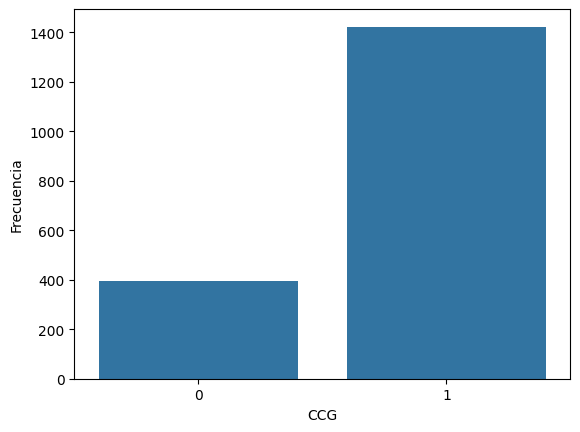

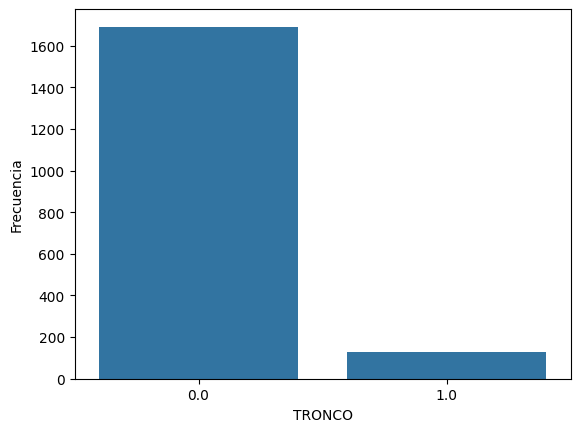

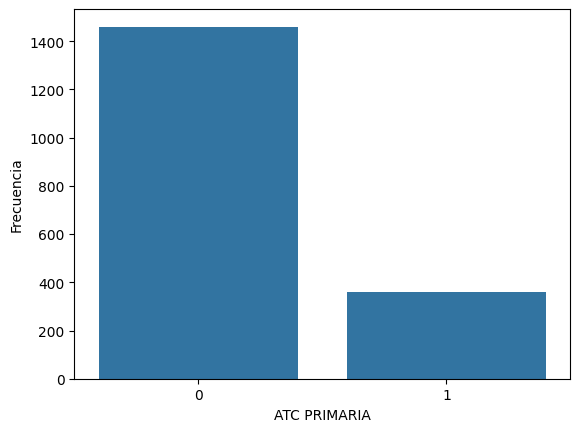

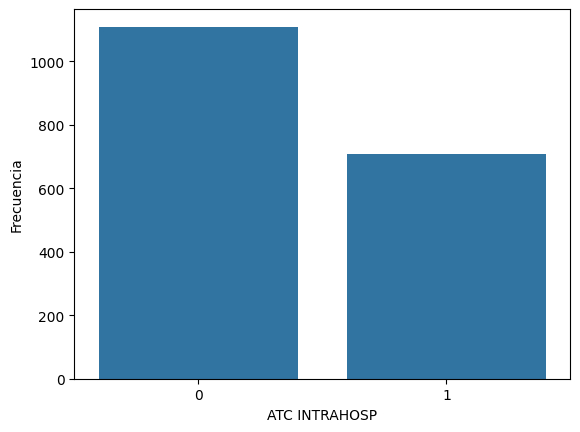

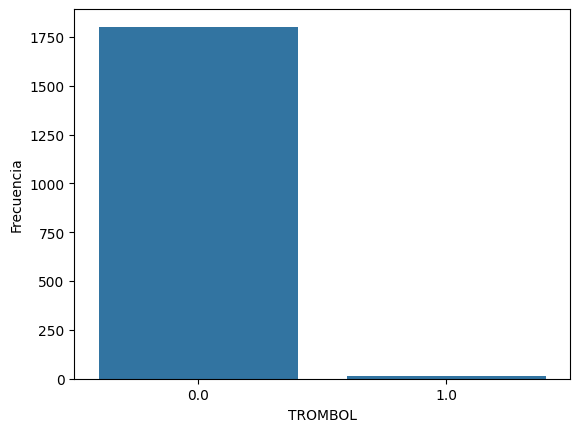

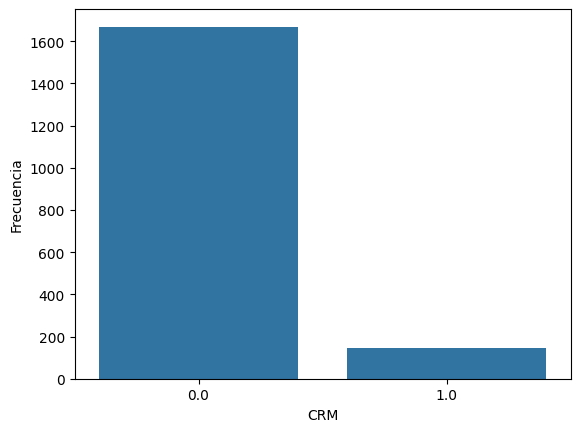

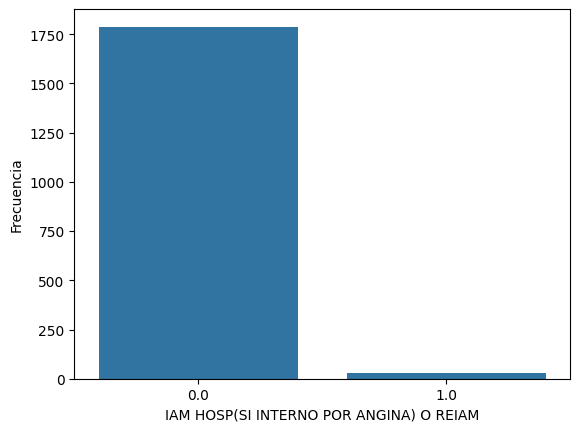

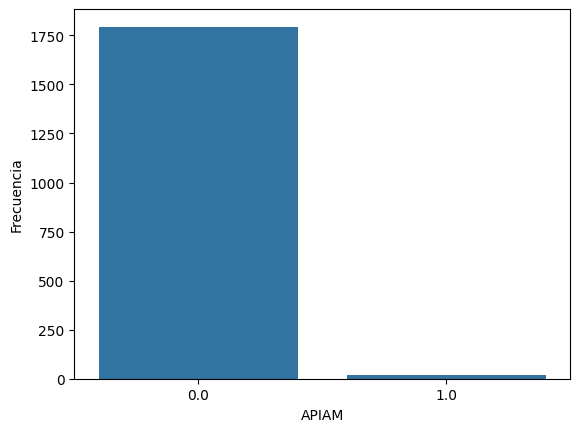

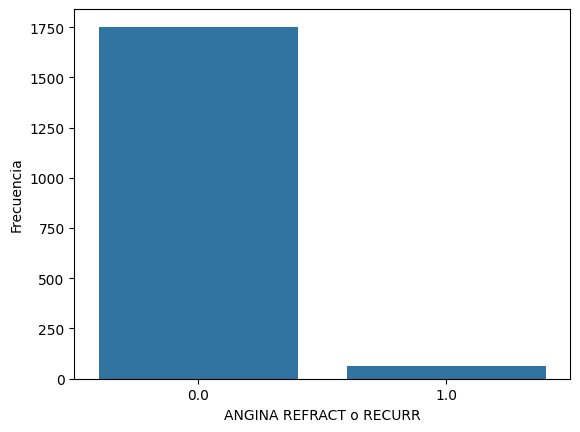

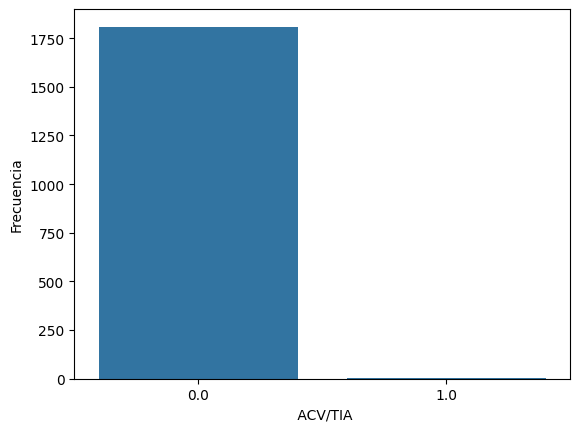

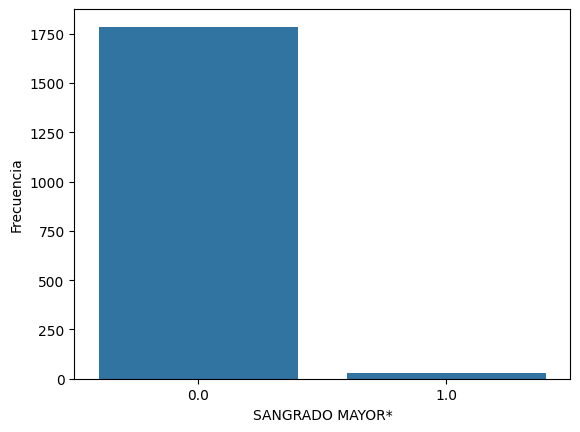

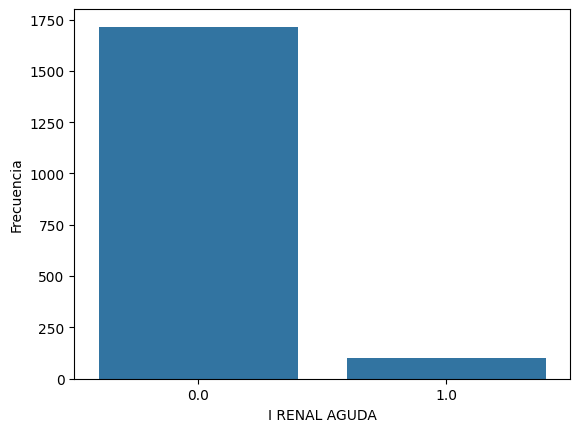

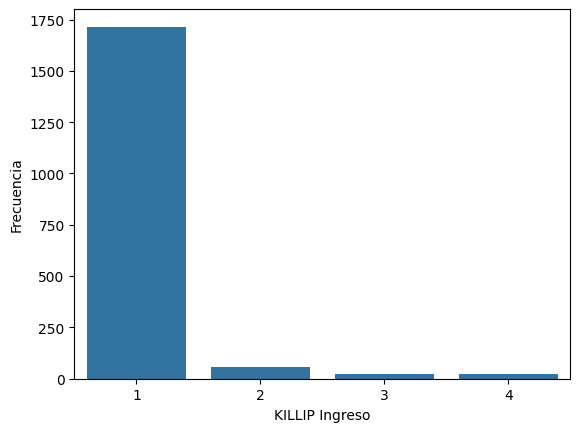

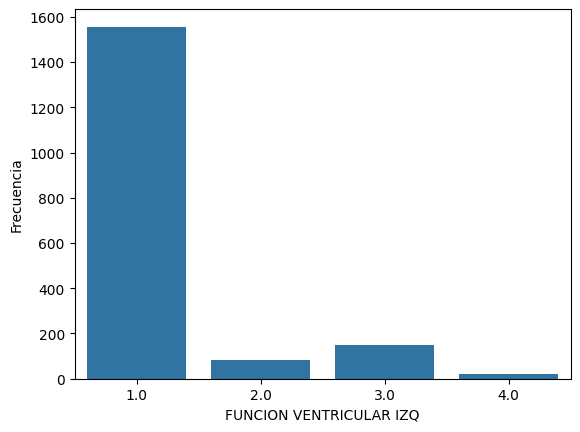

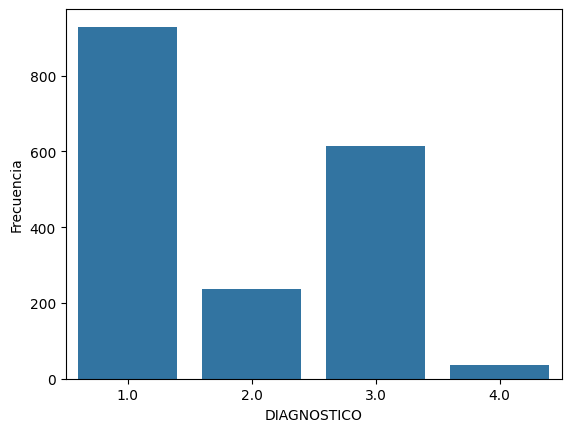

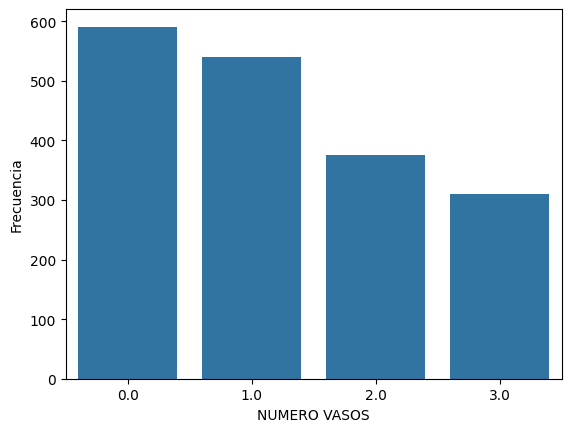

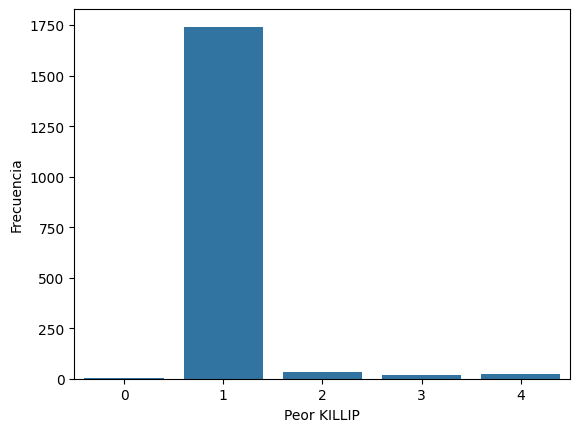

In [15]:
for column in CATEGORY_FEATURES:
    frecuencias = df[column].value_counts()
    df_frecuencias = frecuencias.reset_index()
    df_frecuencias.columns = [column, 'Frecuencia']

    sns.barplot(x=column, y='Frecuencia', data=df_frecuencias)
    plt.show()

Dropeamos la columna 'TROPONINA MAX' ya que por explicación del profesional, es reemplazada por la columna 'Elevacion troponina T' (categorica).

In [16]:
df.drop(columns=['TROPONINA MAX'], inplace=True)
df.to_csv('../data-new/data-without-troponina.csv', index=False)